In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
%cd C:\Users\rishi\Documents\Personal\Learning\Prgming\Python\Python4DS\Datasets

C:\Users\rishi\Documents\Personal\Learning\Prgming\Python\Python4DS\Datasets


In [15]:
%cd MovieLens Dataset
!ls

C:\Users\rishi\Documents\Personal\Learning\Prgming\Python\Python4DS\Datasets\MovieLens Dataset
README.txt
genome-scores.csv
genome-tags.csv
links.csv
movies.csv
ratings.csv
tags.csv


In [35]:
df_gnmtag = pd.read_csv("genome-tags.csv")
df_gnmscor = pd.read_csv("genome-scores.csv")
df_lnks = pd.read_csv("links.csv")
df_mves = pd.read_csv("movies.csv")
df_rtngs = pd.read_csv("ratings.csv")

In [36]:
df_gnmtag.head(1)

,tagId,tag
0,1,007


In [37]:
df_gnmscor.head(1)

,movieId,tagId,relevance
0,1,1,0.02875


In [38]:
df_lnks.head(1)

,movieId,imdbId,tmdbId
0,1,114709,862.0


In [39]:
df_mves.head(1)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [40]:
df_mves['genres_lst'] = df_mves['genres'].str.split("|")
df_mves['genres_cnt'] = df_mves['genres_lst'].str.len()
df_mves

,movieId,title,genres,genres_lst,genres_cnt
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",5
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]",3
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]",2
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]",3
4,5,Father of the Bride Part II (1995),Comedy,[Comedy],1
...,...,...,...,...,...
62418,209157,We (2018),Drama,[Drama],1
62419,209159,Window of the Soul (2001),Documentary,[Documentary],1
62420,209163,Bad Poems (2018),Comedy|Drama,"[Comedy, Drama]",2
62421,209169,A Girl Thing (2001),(no genres listed),[(no genres listed)],1


In [41]:
df_rtngs.head(3)


,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828


In [229]:
df_gner_rtng = df_mves[['movieId','genres_cnt']].join(df_rtngs['rating'])


In [230]:
df_gner_rtng[['genres_cnt','rating']].groupby('rating',as_index = False).count()

,rating,genres_cnt
0,0.5,831
1,1.0,1810
2,1.5,1027
3,2.0,4010
4,2.5,2776
5,3.0,12072
6,3.5,7095
7,4.0,17089
8,4.5,5688
9,5.0,10025


In [228]:
df_gner_rtng.head()

,movieId,genres_cnt,rating
0,1,5,4.5
1,2,3,4.5
2,3,2,4.5
3,4,3,4.5
4,5,1,4.5


In [242]:
dfstg_rtgngner = df_gner_rtng[['genres_cnt','rating']].groupby('genres_cnt',as_index=False).median()
dfstg_rtgngner.head(10)


,genres_cnt,rating
0,1,4.00
1,2,4.00
2,3,4.00
3,4,4.00
4,5,4.00
5,6,3.50
6,7,3.75
7,8,2.25
8,10,5.00


In [86]:
df_stgrtng = df_gner_rtng[['movieId','rating']].groupby('rating',as_index=False).count().rename(columns = {'movieId':'movie_count'})
df_stgrtng.head(10)

,rating,movie_count
0,0.5,831
1,1.0,1810
2,1.5,1027
3,2.0,4010
4,2.5,2776
5,3.0,12072
6,3.5,7095
7,4.0,17089
8,4.5,5688
9,5.0,10025


In [109]:
df_stggenr = df_gner_rtng[['movieId','genres_cnt']].groupby('genres_cnt',as_index=False).count().rename(columns = {'movieId':'movie_count'})
df_stggenr.head(10)

,genres_cnt,movie_count
0,1,30631
1,2,18326
2,3,9852
3,4,2784
4,5,680
5,6,123
6,7,24
7,8,2
8,10,1


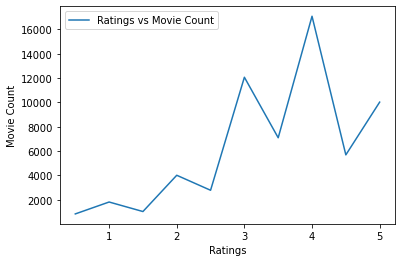

In [134]:
plt.plot(df_stgrtng['rating'],df_stgrtng['movie_count'],label = "Ratings vs Movie Count")
plt.xlabel('Ratings')
plt.ylabel('Movie Count')
plt.legend()
plt.show()

In [127]:
df_stggenr['genres_cnt']

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8    10
Name: genres_cnt, dtype: int64

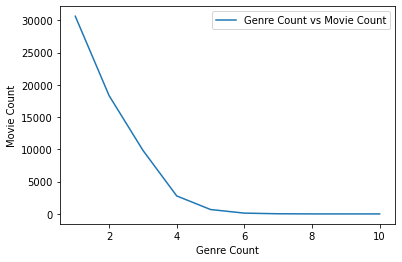

In [135]:
plt.plot(df_stggenr['genres_cnt'],df_stggenr['movie_count'],label = "Genre Count vs Movie Count")
plt.xlabel('Genre Count')
plt.ylabel('Movie Count')
plt.legend()
plt.show()

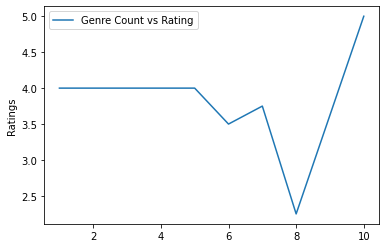

In [244]:
plt.plot(dfstg_rtgngner['genres_cnt'],dfstg_rtgngner['rating'],label = "Genre Count vs Rating")
plt.ylabel('Genre Count')
plt.ylabel('Ratings')
plt.legend()
plt.show()